# Project: Investigating Appointments With No-Show Patients

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I will be exploring the No Show Patient Appointments dataset. I downloaded the No Show Appointments dataset and saved it as 'noshow.csv'. Using the Anaconda jupyter notebook which I installed on my local machine I imported all the packages that might be needed. Some questions I look to answer through analyzing this dataset are:
<ol>
    <li>Could person’s age be a predicting factor on whether they show up or not?</li>
    <li>Does person’s gender have an impact on whether they will show up or not?</li>
    <li>Does receiving SMS have an impact whether persons shows up or not for an appointment?</li>
    


In [1]:
# load libraries;
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
df = pd.read_csv("noshow.csv")
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [4]:
#rename the No-show and SMS_SMS_received column to no_show, SMS so it is earsier to wrok with
df.rename(columns={'No-show': 'No_show', 'SMS_received':'SMS'}, inplace=True)

In [5]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS', 'No_show'],
      dtype='object')

In [9]:
# check dimensions of the dataframe to get the numbers of rows and columns;
df.shape

(110527, 14)

These numbers of rows and columns show a mistake in the dataframe description given by the author on kaggle.com, where he says about 300,000 medical appointments and 15 variables of each.

In [7]:
# check concise summary of the dataframe;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS             110527 non-null  int64  
 13  No_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The number of non-null values in each column (110527) are equal to the number of the dataframe entries (110527) which means there is no missing data in the dataframe and below we check it.

In [8]:
# check if there is any missing data another way;
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS               0
No_show           0
dtype: int64

In [10]:
# check the numbers of unique values in each column;
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS                    2
No_show                2
dtype: int64

The number of PatientId value is less the number of rows of the entire data indicating that some patients had multiplle appointments.

In [12]:
# check for duplicates in patient_id column;
sum(df.PatientId.duplicated())

48228

The patientId has 48,228 dulplicate values confirming that some patients had multiplle appointments 

In [13]:
# check data types of each column; 
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS                 int64
No_show            object
dtype: object

### In conclusion
We can conclude That:
<ul>
    <li>the dataset has 110,527 rows and 14 columns</li>
    <li>there are no missing data or duplicated rows</li>
    <li>the patient_id column has 48,228 duplicate values indicating some patients had multipple appointments</li>
    <li>the age column has values such as -1 and 0 (-1 seems like a typing error, and 0 means children under one year according the dataframe author explanation)</li>
    </ul>

### Data Cleaning 

#### Given the dataframe inspection we performed above these tasks need to be performed:
<ul>
    <li>Drop the row where the age is equal -1</li>
    <li>Change SMS column values to Yes and No for convenience of further calculations and convert these columns to string data type</li>
    </ul>

In [16]:
# drop the row where age less than 0 and check changes;;
df = df.query('Age >= 0')
print(sorted(df.Age.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [22]:
# change values in  SMS column to Yes and No and check changes;
df['SMS'] = df['SMS'].apply(str)
df['SMS'].replace(['1', '0'], ['Yes', 'No'], inplace = True);
df.head()

<ipython-input-22-1271cf8c9651>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMS'] = df['SMS'].apply(str)
C:\Users\caaaq\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,No,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,No,No


<a id='eda'></a>
## Exploratory Data Analysis

At this stage we explore the obtained and cleaned data in order to answer research questions which are indicated in the introduction.

### Research Question 1: Could person’s age be a predicting factor on whether they show up or not?

Explore the dataframe in terms of age, gender and so on.However, some patients had multipple appointments so we need to drop the duplicates and create a new data frame.


In [24]:
# drop rows with duplicated patient_id values and check dementions of the new dataframe;
df_2 = df.drop_duplicates(['PatientId'], keep='first')
df_2.shape

(62298, 14)

#### Age

Exploring the dataframe in terms of patient distribution by Age

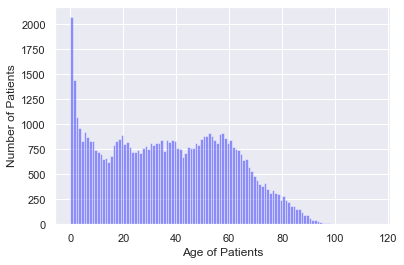

In [25]:
# patient distribution by age;
sns.distplot(df_2['Age'], bins=115, color='blue', kde = False);
plt.xlabel('Age of Patients');
plt.ylabel('Number of Patients');

In [26]:
# statisctics: mean, min, 25%, 50%, 75% max for age;
df_2.Age.describe()

count    62298.000000
mean        36.705496
std         23.531076
min          0.000000
25%         17.000000
50%         36.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

As we can see the average age of patients is about 37 y.o., youngest patients are children under 1 y.o. and the oldest patients are 115 y.o. Only 25% patients are children and teenagers and 75% are not older than 56 y.o.

For the further exploration divide the patients into 5 age groups.

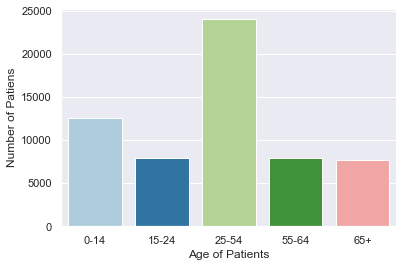

In [27]:
# cut the age column data into discrete chunks;
bin_values = [0, 15, 25, 55, 65, 115]
bin_names = ['0-14', '15-24', '25-54', '55-64', '65+']
ages = pd.cut(df_2.Age, bins=bin_values, labels=bin_names)
sns.countplot(x=ages, palette='Paired').set_xticklabels(bin_names);
plt.xlabel('Age of Patients');
plt.ylabel('Number of Patiens');

Below we further explore how many patients from each age group came to their appointments and how many did not come in proportions, then visualize the data.

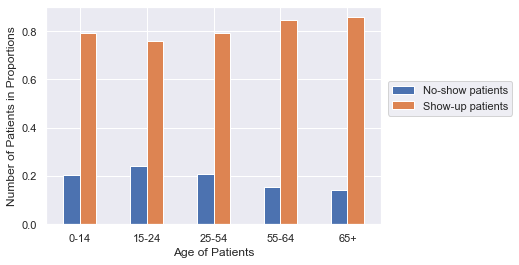

In [28]:
# divide each age bin into 2 groups: patients who came to the appointment and who did not
# and create new dataframe with obtained data in proportions;
df_age_no_show = df_2.groupby([pd.cut(df_2['Age'],bin_values),'No_show']).count().PatientId.unstack()
df_age_no_show['No-show patients'] = df_age_no_show['Yes'] / (df_age_no_show['Yes'] + df_age_no_show['No'])
df_age_no_show['Show-up patients'] = df_age_no_show['No'] / (df_age_no_show['Yes'] + df_age_no_show['No'])
df_age_no_show.drop(['No', 'Yes'], axis=1, inplace=True)

# visualize the result;
df_age_no_show.plot(kind='bar').set_xticklabels(['0-14', '15-24', '25-54', '55-64', '65+'], rotation=0);
plt.xlabel('Age of Patients');
plt.ylabel('Number of Patients in Proportions');
plt.legend(loc=(1.02, 0.50));

As we can see young patients (aged 15-24) tend to miss their appointments often than other groups of patients. Elderly patients (aged 65 and above) tend to miss the appointments less often than other groups of patients. So we can conclude that the older the patients get, the less likely they will miss the appointments.

The only exception is children under the age of 15. Since they usually visit doctors accompanied by their parents the relation between missing and not missing appointments should be approximately equal the same relation for adult patients (aged 25-54) which is obtained data confirms.

### Research Question 2: Does person’s gender have an impact on whether they will show up or not?

In [29]:
# patient distribution by gender in absolute numbers;
df_2.Gender.value_counts()

F    40045
M    22253
Name: Gender, dtype: int64

In [30]:
# patient distribution by gender in proportions;
df_2.Gender.value_counts(normalize=True)

F    0.642798
M    0.357202
Name: Gender, dtype: float64

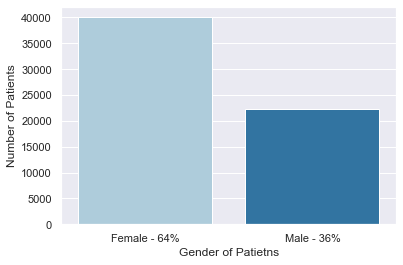

In [31]:
# visualization of patient distribution by gender;
sns.countplot(x='Gender', data=df_2, palette='Paired').set_xticklabels(['Female - 64%', 'Male - 36%']);
plt.xlabel('Gender of Patietns');
plt.ylabel('Number of Patients');

Explore how many females and males came to their appointments and how many did not come in proportions, then visualize the data.

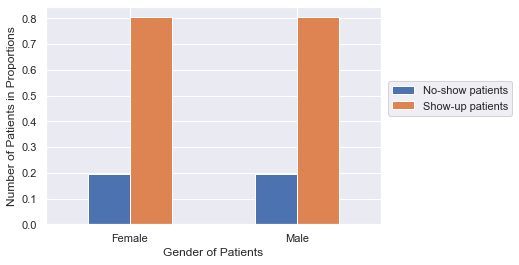

In [32]:
# get the data how many females and males came to their appointments and how many did not come in proportions;
f_no_show = df_2.query('Gender == "F"').groupby('No_show').size().transform(lambda x: x/x.sum())
m_no_show = df_2.query('Gender == "M"').groupby('No_show').size().transform(lambda x: x/x.sum())

# create dataframe using obtained data;
gender_no_show = [{'No-show patients': f_no_show['Yes'], 'Show-up patients': f_no_show['No']},
                  {'No-show patients': m_no_show['Yes'], 'Show-up patients': m_no_show['No']}]
df_gender_no_show = pd.DataFrame(gender_no_show)
df_gender_no_show.insert(0, 'Gender', ['Female', 'Male'])
df_gender_no_show = df_gender_no_show.set_index('Gender')

# visualize the proportion females and males who came and did not come to their appointments;
df_gender_no_show.plot(kind='bar').set_xticklabels(['Female', 'Male'], rotation = 0);
plt.xlabel('Gender of Patients');
plt.ylabel('Number of Patients in Proportions');
plt.legend(loc=(1.02, 0.50));

As we can see almost equal numbers females and males miss their appointments so we cannot say that there is any relationship between gender and patients no-shows.

### Research Question 1: Could person’s age be a predicting factor on whether they show up or not?

Explore the appointment distribution by numbers of the appointment reminders. As it does not matter for this analysis if the appointment was first or follow-up we should use the original dataframe with non-unique patients.

In [33]:
# check how many appointments were preceded by sms and how many were not in absolute number;
df.SMS.value_counts()

No     75044
Yes    35482
Name: SMS, dtype: int64

In [34]:
# check how many appointments were preceded by sms and how many were not in proportions;
df.SMS.value_counts(normalize=True)

No     0.678971
Yes    0.321029
Name: SMS, dtype: float64

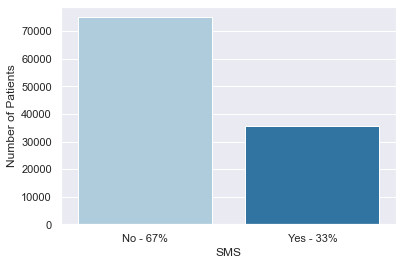

In [35]:
# visualize ow many appointments were preceded by sms and how many were not;
sns.countplot(x='SMS', data=df, palette='Paired').set_xticklabels(['No - 67%', 'Yes - 33%']);
plt.xlabel('SMS');
plt.ylabel('Number of Patients');

Explore how many appointments with and without sms were missed and were not missed by patients in proportions, then visualize the data.

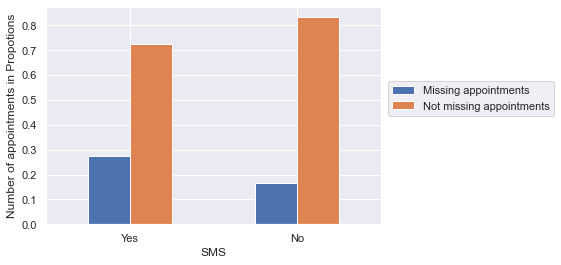

In [36]:
# get the data how many appointments with and without sms were missed and were not missed by patients in proportions;
sms_no_show = df.query('SMS == "Yes"').groupby('No_show').size().transform(lambda x: x/x.sum())
nosms_no_show = df.query('SMS == "No"').groupby('No_show').size().transform(lambda x: x/x.sum())

# create dataframe using obtained data;
sms_no_show = [{'Missing appointments': sms_no_show['Yes'], 'Not missing appointments': sms_no_show['No']},
                  {'Missing appointments': nosms_no_show['Yes'], 'Not missing appointments': nosms_no_show['No']}]
df_sms_no_show = pd.DataFrame(sms_no_show)
df_sms_no_show.insert(0, 'SMS', ['Yes', 'No'], True)
df_sms_no_show = df_sms_no_show.set_index('SMS')

# visualize the proportion of appointments with and without sms which were missed and were not;
df_sms_no_show.plot(kind='bar').set_xticklabels(['Yes', 'No'], rotation = 0);
plt.ylabel('Number of appointments in Propotions');
plt.xlabel('SMS');
plt.legend(loc=(1.02, 0.50));

As we can see the appointments preceded by sms were missed noticeably more than the appointments without sms. So according obtained results the appointment reminders are more related to the patient no-shows.

<a id='eda'></a>
## Conclusions

The analysis showed the following:
<ul>
<li>In terms of age the greatest tendency to miss their appointments is shown by the young patients, the least - the patients aged 65 y.o. and above. The older the patients get, the less likely they miss the appointments, except for children under the age of 15 y.o. Since they usually visit doctors accompanied by their parents the relation between the missing and not missing appointments is equal the same relation for the patients aged 25-54 y.o.</li>

<li>Women and men miss their appointments equally, however female patients are almost twice as many as male. This can be explained by the fact that women more often accompany their children to medical appointments than men.</li>

<li>As opposed to what was expected the appointments which were preceded by sms reminders were missed noticeably more than the appointments without sms reminders.</li>
</ul>
